# AI in Medicine <br> Data visualization with *matplotlib*/*Seaborn*

Tutor: *Moritz Seiler*

Email: *moritz.seiler@charite.de*

This notebook introduces data visualization in Python with *matplotlib* and *Seaborn*. The notebook consists of two  parts; while the first part introduces data visualization using the *matplotlib* library, the second part introduces the *Seaborn* library. Every part has a short introduction of the library as well as some practice excercises.

*matplotlib*
- Basics in *matplotlib*
- Generating a figure
- Examples of different visualization methods
- Save plot
- Exercises

*Seaborn*
- Basics in *Seaborn*
- Examples of different visualization methods
- Exercises

The data we are using in this tutorial is the Alzheimer's disease data set that you have already prepared in the previous tutorial.

In [1]:
# Import the Pandas and NumPy library
import pandas as pd
import numpy as np

# Read the Alzheimer's disease data set 
ad = pd.read_csv('/analysis/ritter/teaching/AI_in_Medicine/alzheimers_disease.csv')
# Select cross-sectional baseline data
data = ad[ad['VISCODE']=='bl']

/home/moritz/anaconda3/envs/pytorch/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16,17,18,99,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## `matplotlib`

### Installation

For an installation of the *matplotlib* library, you have to enter the following command in the terminal.

```python
!pip install matplotlib
```

### Importing the library

A library is imported using the command *import*. In the following, we will use the *pyplot* module, which we will call *plt*.

In [2]:
# Import the pyplot module
import matplotlib.pyplot as plt

### Getting started!

As you have already seen before, there are several common approaches to plotting with matplotlib:

- object-oriented API,
- *pyplot* API.

We will use both approaches to create figures in *matplotlib*. When using the object-oriented approach, we have to initialize the objects *Figure* and *Axes* first. This is commonly done by calling the `pyplot.figure()` function and adding the *Axes* object via `pyplot.add_axes()`.

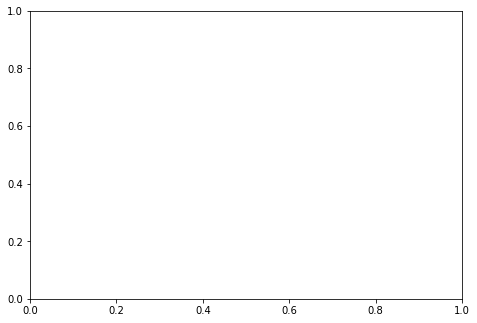

In [3]:
# Initialize `Figure` and `Axes` object
fig = plt.figure()
ax = fig.add_axes( [0, 0, 1, 1]) # [bottom, top, width, height]

Alternatively, we can use `pyplot.subplots()` to initialize both the *Figure* and the *Axes* object. You can also generate several *Axes* objects in one *Figure*.

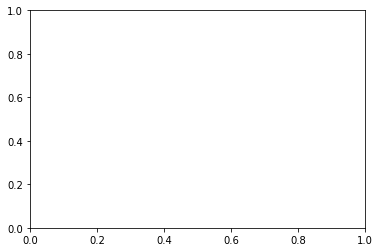

In [4]:
# Initialize `Figure` and `Axes` object
fig, ax = plt.subplots(nrows=1, ncols=1) # 1 row, 1 column

When using the *pyplot* module, the initialization happens implicitly in the background.

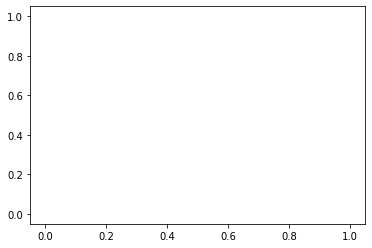

In [5]:
plt.plot();

So, let's create our first plot using *matplotlib*.

### First plot with `matplotlib`

Plotting in *matplotlib* follows a certain rountine which includes the following steps:

1. Prepare data
2. Create plot
3. Plot
4. Customize plot
5. Save plot
6. Show plot

So, let's first create a small data set for a simple visualization using *matplotlib*.

In [6]:
# Generate data set (STEP 1)
x = [1,2,3,4]
y = [1,2,3,4]

#### object-orientiented

As seen above, when using the pure *matplotlib* object-oriented approach, we first have to initialize the *Figure* and *Axes* objects. After that, we can simply use a plotting method on the *Axes* object. In this small example we're going to create a simple line graph.

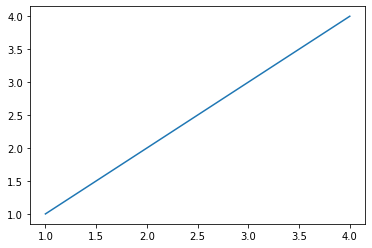

In [7]:
# Line Plot using the object-oriented approach
fig, ax = plt.subplots(1, 1) # Initializing the 'Figure' and 'Axes' objects (STEP 2)
ax.plot(x, y); # Line Plot function (STEP 3)
#ax.set_xlabel('x'); #  Set label for x-Axis (STEP 4)
#ax.set_ylabel('y'); # Set label for y-Axis
#ax.set_title('My first Plot with matplotlib'); # Set title
plt.show() # (STEP 6)

Before we move on, let's have a look at the *matplotlib* documentation of the line plot method:

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot

Alternatively, we can use the following command to open the documentation in the notebook.

In [3]:
plt.plot?

#### pyplot

In contrast to the object-oriented approach, we can just call the plotting function without initializing any objects in the *pyplot* module.

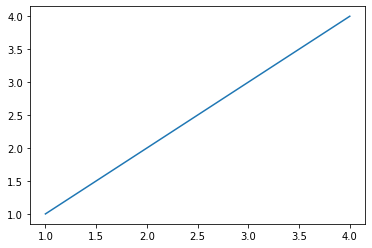

In [8]:
# Line Plot using pyplot
plt.plot(x,y); # Line Plot function (STEP 2 & 3)
#plt.xlabel('x'); # Set label for x-Axis (STEP 4)
#plt.ylabel('y'); # Set label for y-Axis
#plt.title('My second Plot with matplotlib'); # Set title
plt.show() # STEP 6

### Plot functions

*Matplotlib* offers a huge amount of plotting methods/functions. A good starting point, so you don't have to start from scratch, is the *matplotlib* gallery, where you can find example code for some of these methods/functions (https://matplotlib.org/gallery/index.html). 

*Note: Interestingly, just about all methods of an Axes object exist as a function in the pyplot module (and vice-versa).*

A small list of ```pyplot``` functions:

- **Histogram:** plt.hist(x)
    * x: numerical (converted into categorical)
    * distribution of x
    
- **Box Plot:** plt.boxplot(x)
    * x: numerical
    * distribution of x / identification of outliers
- **Violin Plot:** plt.violinplot(x)
    * x: numerical
    * distribution of x 
- **Pie Chart:** plt.pie(x) *(not recommended)*
    * x: categorical
    * proportions of categories in x
- **Scatter Plot**:   plt.scatter(x,y)
    * x: numerical
    * y: numerical
    * joint distribution of x and y / identification of outliers
- **Line Plot**:  plt.plot(x, y)
    * x: numerical/categorical
    * y: numerical
    * function *(math.)* / time-series
- **Bar Plot**:  plt.bar(x, y) 
    * x: categorical
    * y: numerical (often count of x)
    * joint distribution of x and y / identification of outliers
- **Contour Plot**: plt.contour(X, Y, Z)
    * X: numerical
    * Y: numerical
    * Z: numerical
    * 3D surface on a 2D format
- ...

### Examples

Let's look at some examples using both approaches.

***Histogram***

In our first example, we want to visualize the age distribution of the subjects in our data set using a histogram. The variable age is numerical and will be turned into a categorical variable due to binning. But before we plot the distribution, let's have a  look at the 5-number summary of our age variable.

In [9]:
# 5-number summary of age variable
data['AGE'].describe()

count    2246.000000
mean       73.199421
std         7.398899
min         0.000000
25%        68.300000
50%        73.200000
75%        78.300000
max        91.400000
Name: AGE, dtype: float64

It seems that we have a typo in the age data, because the smallest value for our variable is 0, which is unrealistic. Let's check how many 0 values we have in our data and what the next smallest value is.

In [10]:
# Count cases where age is 0
sum(data['AGE'] == 0)

1

In [11]:
# Next smallest value apart from 0
min(data[data['AGE'] != 0]['AGE'])

54.4

Let's also check if any 'NA's are in the age data. 

In [12]:
sum(data['AGE'].isnull())

2

For now, we ignore these case and leave the subject in the dataset.

Because in a histogram the numerical values are grouped in bins *(binning)*, we have to first determine the number of bins; and therefore, the width of our groups. In our small example, we simply choose 20 bins for the age variable and plot the histogram using both approaches.

/home/moritz/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/moritz/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


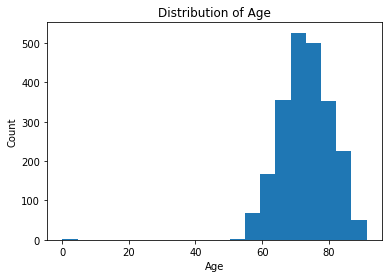

In [13]:
# Histogram - object-oriented

# Number of bins
num_bins = 20

# Histogram
fig, ax = plt.subplots(1, 1)
ax.hist(data['AGE'], 
        bins = num_bins)
#ax.hist(data['AGE'].dropna(), bins = num_bins)

# Set axis labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Distribution of Age');

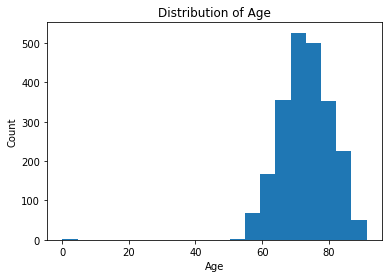

In [14]:
# Histogram - pyplot

# Number of bins
num_bins = 20

# Histogram
plt.hist(data['AGE'], 
         bins = num_bins);

# Set axis labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age');

We see that the distribution is skewed because we left the subject with age 0 in our data set. The warning appears due to the 'NA's in the data set, which simply get dropped for the plot. ***Be aware of this!!!***

*Note: A histogram in matplotlib returns 3 lists: 1) counts of groups, 2) edges of the bins and 3) patches.*  

***Boxplot***

In our next example, we want to visualize the marginal distributions of age and education levels by gender using boxplots. The boxplot method/function does not simply drop the 'NA's in our data, so we have to remove those subjects manually. Additionally, we have to split our data set into two subsets containing either the female subjects or the male subjects. 

In [15]:
# Select subjects with age not 'NA'
nonna_age = data[~data['AGE'].isnull()]

# Create a subset for female and male
data_f = nonna_age[nonna_age['PTGENDER'] == 'Female']
data_m = nonna_age[nonna_age['PTGENDER'] == 'Male']

Now, we plot the marginal distributions for the variables age and education level in one *Figure* object, which means we need two *Axes* objects.

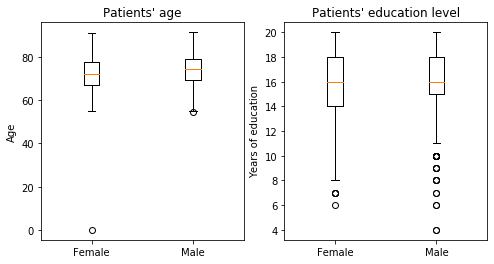

In [16]:
# Boxplot - object-oriented
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

# Boxplot Age
ax1.boxplot([data_f['AGE'], data_m['AGE']], 
            labels=['Female', 'Male'])
# Set y-axis label and title
ax1.set_ylabel("Age")
ax1.set_title("Patients' age");

# Boxplot Education Level
ax2.boxplot([data_f['PTEDUCAT'], data_m['PTEDUCAT']], 
            labels=['Female', 'Male'])
# Set y-axis label and title
ax2.set_ylabel("Years of education")
ax2.set_title("Patients' education level");

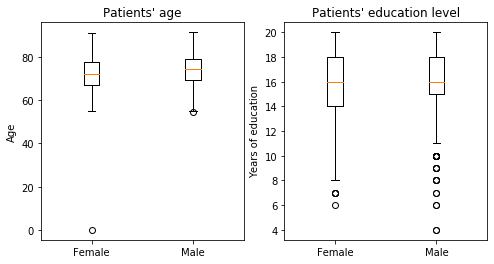

In [17]:
# Boxplot - pyplot
plt.figure(figsize=(8,4)) # Just to control the figure size, otherwise overlaps

# Boxplot Age
plt.subplot(1,2,1) # # of rows, # of columns, plot number
plt.boxplot([data_f['AGE'], data_m['AGE']], 
            labels=['Female', 'Male'])
# Set y-axis label and title
plt.ylabel('Age');
plt.title("Patients' age");

# Boxplot Education Level
plt.subplot(1,2,2) # of rows, # of columns, plot number
plt.boxplot([data_f['PTEDUCAT'], data_m['PTEDUCAT']], 
            labels=['Female', 'Male'])
# Set y-axis label and title
plt.ylabel('Years of education')
plt.title("Patients' education level");

We see a negatively skewed age distribution for females and analmost symmetric age distribution, but with comparable medians for both men and women. Furthermore, the boxplots show a clear outlier (as seen before) in the female age distribution, while we see just some values below the lower whisker in the male distribution. For the education level, we see two negatively skewed distribution of education levels with comparable medians but with a higher kurtosis for the male distribution. 

***Scatter Plot + Histograms***

In the last example, we create a more complex visualization; namely, we want to visualise the joint distribution as well as the marginal distributions of age and level of education by gender in one plot. Because we need more control over the plot, we just use the object-oriented approach for this task.

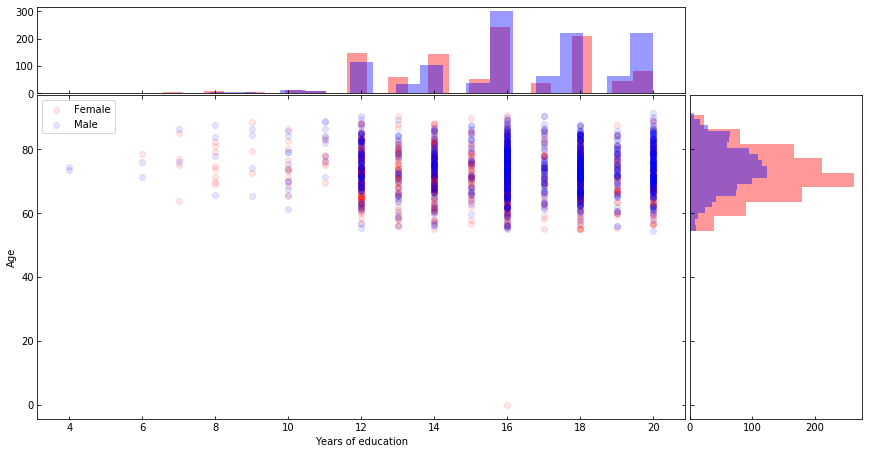

In [18]:
# Define the plotting areas
left, width = 0.1, 0.75
bottom, height = 0.1, 0.75
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# Initialize 'Figure' object
plt.figure(figsize=(12,6))

# Initialize 'Axes' object 
ax_scatter = plt.axes(rect_scatter)

# Customize ticks
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# Scatter Plots
ax_scatter.scatter(data_f['PTEDUCAT'], 
                   data_f['AGE'], 
                   alpha = 0.1, 
                   color='red', 
                   label='Female')
ax_scatter.scatter(data_m['PTEDUCAT'], 
                   data_m['AGE'], 
                   alpha = 0.1, 
                   color='blue', 
                   label='Male')

# Histograms - female data
ax_histx.hist(data_f['PTEDUCAT'], 
              bins=25, 
              color='red', 
              alpha=0.4)
ax_histy.hist(data_f['AGE'], 
              bins=20, 
              color='red', 
              alpha=0.4, 
              orientation='horizontal')

# Histrograms - male data
ax_histx.hist(data_m['PTEDUCAT'], 
              bins=25, 
              color='blue', 
              alpha=0.4)
ax_histy.hist(data_m['AGE'], 
              bins=20, 
              color='blue', 
              alpha=0.4, 
              orientation='horizontal')

# Set axis limits
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

# Set axis labels
ax_scatter.set_ylabel('Age')
ax_scatter.set_xlabel('Years of education')

# Add legend
ax_scatter.legend();



As you can see, it is possible to use several methods on the same *Axes* object to visualize different categories for example. 

### Save plots

You can easily save your created figures by adding the function ```plt.savefig()``` to your code. The only argument you need to pass to the function is a complete path/just the file name (you then save it in your directory).

*Recommendation: Use vector-based graphics; so, you don't get blurry figures in your document later on (e.g. SVG, EPS, PDF)*

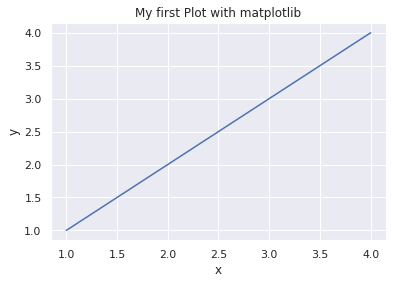

In [279]:
fig, ax = plt.subplots(1, 1) # Initializing the 'Figure' and 'Axes' objects 
ax.plot(x, y); # Line Plot function 
ax.set_xlabel('x'); #  Set label for x-Axis 
ax.set_ylabel('y'); # Set label for y-Axis
ax.set_title('My first Plot with matplotlib'); # Set title

# Save plot
plt.savefig('line.svg', 
            format='svg', 
            bbox_inches = 'tight'); # bbox_inches = 'tight' created a padding around the figure

### Exercises

Now, it's time for you to get your hands on the keyboard. Please answer the following questions by choosing a **suitable graphical representation** of the data including axis labels, title and legend (if necessary). In order to avoid repetitions, choose just **one** of the options presented above per task but try use both approaches within these exercises. Before you create a plot, please check whether difficulties can arise and how they can be remedied. For simplicity, 'NA's can be removed from the data. 

*Tip:* The following resources might be helpful:
- www.stackoverflow.com
- matplotlib documentation: https://matplotlib.org/api/axes_api.html
- pyplot documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot

1) **Plot the gender distribution.**<br> 
*Tip*: The following functions might be helpful:
- <code> pd.unique()<code>
- <code>pd.value_counts()<code>

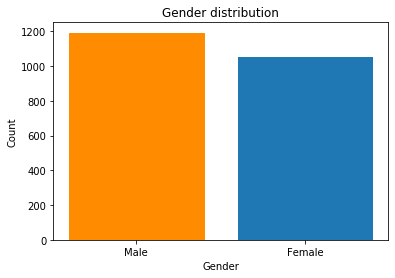

In [19]:
# Determine the unique gender labels
label_sex = data['PTGENDER'].unique()

# Count per label
counts_sex = data['PTGENDER'].value_counts()

## object-oriented
# Plot gender distribution
fig, ax = plt.subplots(1, 1)
b = ax.bar(label_sex, counts_sex)
b[0].set_color('darkorange')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Gender distribution');

## pyplot
## Plot gender distribution
#b = plt.bar(label_sex, counts_sex)
#b[0].set_color('darkorange')
#plt.xlabel('Gender')
#plt.ylabel('Count')
#plt.title('Gender distribution');

2) **Plot the distribution of diagnoses by gender.** <br>
*Tip*: The following functions might be helpful:
- <code>  pd.dropna()/pd.isnull()<code>
- <code> pd.unique()<code>
- <code>pd.value_counts()<code>

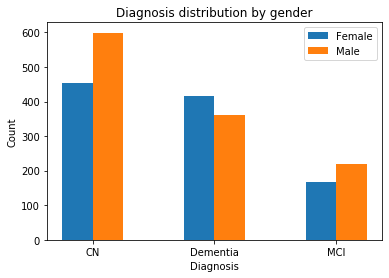

In [20]:
# Determine the unique diagnosis labels
diagnosis = data[~pd.isnull(data['DX'])]['DX'].unique()
# diagnosis = data['DX'].dropna().unique()

# Count per diagnosis by gender
diagnosis_counts_f = data[data['PTGENDER'] == 'Female']['DX'].value_counts()
diagnosis_counts_m = data[data['PTGENDER'] == 'Male']['DX'].value_counts()

# object-oriented
# Plot the distribution of diagnoses by gender
ind = np.arange(len(diagnosis))
width = 0.25

fig, ax = plt.subplots(1, 1)
ax.bar(ind-width/2, 
       diagnosis_counts_f,
       width=width, 
       label='Female')
ax.bar(ind+width/2, 
       diagnosis_counts_m,
       width=width, 
       label='Male')

ax.set_xticks(ind)
ax.set_xticklabels(diagnosis)
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Count')
ax.set_title('Diagnosis distribution by gender')
ax.legend();

## pyplot
## Plot the distribution of diagnoses by gender
#plt.bar(ind-width/2, 
#        diagnosis_counts_f,
#        width=width, 
#       label='Female')
#plt.bar(ind+width/2, 
#        diagnosis_counts_m,
#        width=width, 
#        label='Male')

#plt.xticks(ind, diagnosis)
#plt.xlabel('Diagnosis')
#plt.ylabel('Count')
#plt.title('Diagnosis distribution by gender')
#plt.legend();

3a) **Plot the joint distribution of age and brain volume by diagnosis.**

*Tip:* The following functions might be helpful:
- <code>  pd.dropna()/pd.isnull()<code>
- <code> pd.unique()<code>

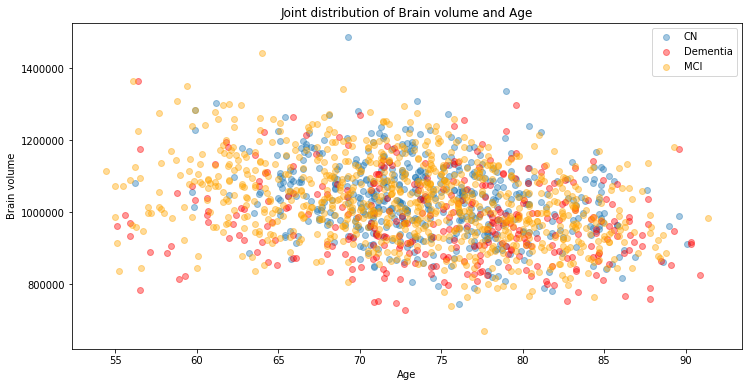

In [22]:
# Determine the unique diagnosis labels
diagnosis_label = data[~pd.isnull(data['DX'])]['DX'].unique()
# diagnosis = data['DX'].dropna().unique()

# object-oriented
# Plot the joint distribution of age and brain volume by gender
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(data[data['DX']=='CN']['AGE'], 
           data[data['DX']=='CN']['WholeBrain'], 
           alpha=0.4,
           label='CN')

ax.scatter(data[data['DX']=='Dementia']['AGE'],
           data[data['DX']=='Dementia']['WholeBrain'],
           alpha=0.4, 
           color='red', 
           label='Dementia')

ax.scatter(data[data['DX']=='MCI']['AGE'],
           data[data['DX']=='MCI']['WholeBrain'],
           alpha=0.4, 
           color='orange', 
           label='MCI')

ax.set_xlabel('Age')
ax.set_ylabel('Brain volume')
ax.set_title('Joint distribution of Brain volume and Age')
ax.legend();


## pyplot
## Plot the joint distribution of age and brain volume by gender
#plt.figure(figsize=(12,6))
#plt.scatter(data[data['DX']=='CN']['AGE'], 
#            data[data['DX']=='CN']['WholeBrain'], 
#            alpha=0.1,
#            label='CN')

#plt.scatter(data[data['DX']=='Dementia']['AGE'],
#            data[data['DX']=='Dementia']['WholeBrain'],
#            alpha=0.1, 
#            color='red', 
#            label='Dementia')

#plt.scatter(data[data['DX']=='MCI']['AGE'],
#            data[data['DX']=='MCI']['WholeBrain'],
#            alpha=0.1, 
#            color='orange', 
#            label='MCI')

#plt.xlabel('Age')
#plt.ylabel('Brain volume')
#plt.title('Joint distribution of Brain volume and Age')
#plt.legend();

3b) **What kind of relationship can be determined graphically?** 

slightly negative linear relationship

3c) **How can this relationship be expressed quantitatively?**

In [23]:
# Pearson correlation between 'Age' and 'DX'
corr = data[['AGE','WholeBrain']].corr(method='pearson')
corr

,AGE,WholeBrain
AGE,1.000000,-0.292956
WholeBrain,-0.292956,1.000000


4) **What are the 10 most occuring jobs in the data set?**

*Tip:* The following functions might be helpful:
- <code>  pd.str.lower()<code>
- <code> pd.value_counts()<code>
- <code> pd.index.tolist()<code>

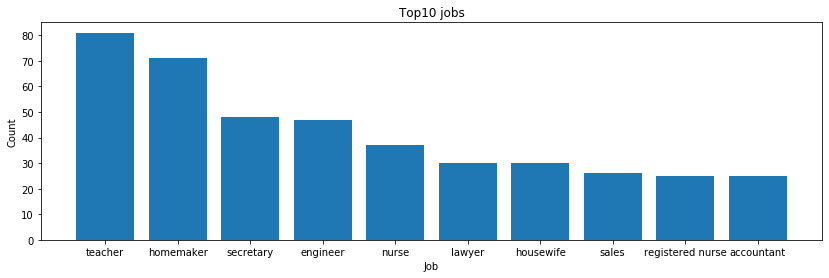

In [24]:
# Determine the top 10 jobs
jobs = data['WORK'].str.lower()
count_jobs = jobs.value_counts()
count_top10_jobs = count_jobs[:10]
label_top10_jobs = count_top10_jobs.index.tolist()

# object-oriented
# Plot the top 10 jobs
ind = np.arange(len(count_top10_jobs))

fig, ax = plt.subplots(1,1, figsize=(14,4))
ax.bar(ind, count_top10_jobs)
ax.set_xticks(ind)
ax.set_xticklabels(label_top10_jobs)

ax.set_xlabel('Job')
ax.set_ylabel('Count')
ax.set_title('Top10 jobs');

## pyplot
## Plot the top 10 jobs
#ind = np.arange(len(count_top10_jobs))

#plt.figure(figsize=(14,4))
#plt.bar(ind, count_top10_jobs)
#plt.xticks(ind, label_top10_jobs)

#plt.xlabel('Job')
#plt.ylabel('Count')
#plt.title('Top10 jobs');

5) **Be creative and visualize interesting information from the data.**

## Seaborn

Matplotlib has proven to be an incredibly useful and popular visualization tool, but it comes with drawbacks:

- defaults are not exactly the best choices,
- API is relatively low level,
- lacking compatability with *pandas DataFrame*s

Adressing these drawbacks, *Seaborn* is statistical plotting library build on top of *matplotlib* and provides an API that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and provides a close integration with *pandas* data structures.

Behind the scenes, *Seaborn* uses matplotlib to draw plots; so, if you know *matplotlib*, you’re already halfway through *Seaborn*. Many tasks can be accomplished with only seaborn functions, but further customization might require using *matplotlib* directly. 

### Installation

For an installation of the *Seaborn* library, you have to enter the following command in the terminal.

```python
!pip install seaborn
```

### Import the library

A library is imported using the command import. In the following, we will call the library ```sns```.


In [25]:
# Laden der seaborn library
import seaborn as sns

# Default seaborn theme
sns.set()

### Getting started!

Let's have a look at some of the drawbacks of *matplotlib* and how *Seaborn* adresses these.

#### Close integration with ```Pandas```

As mentioned before, *Seaborn* is closely integrated with *pandas DataFrame*s; so, for most of the functions you simply specify your data set in your plotting function and call a variable by using its header/column name. 

In [26]:
# Convert our toy data set into a dataframe
df = pd.DataFrame({'x': x, 'y': y})

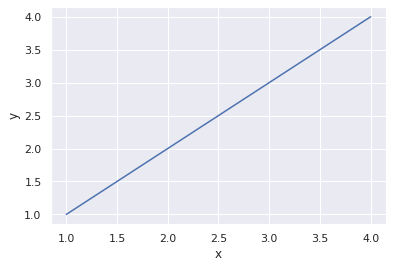

In [27]:
# Line plot
sns.lineplot(data=df,
             x='x',
             y='y');

Here, another example of the close integration with *pandas* can be seen in the plot; *Seaborn* loads the full data set and uses the selected header/column names as axis labels.

Some plots in *Seaborn* don't support the option to load in the full data set and then to select a variable by its header/column name, e.g. histogram (```sns.distplot(x)```).

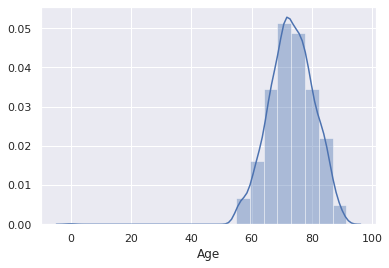

In [28]:
# Histogram
g = sns.distplot(data['AGE'].dropna(), bins=20)
g.set(xlabel='Age');

The kernel density estimator is returned per default, if you don't want to visualize it just add the argument ```kde=False``` to the function.

#### High-level functions

In *matplotlib*, tasks like plotting counts for categorical data, like you did in ex.1 and ex.2, is tedious. First, you have to count your categories and then pass these to the bar plot function. In contrast, *Seaborn* provides high-level functions for these tasks which will do all the work for you. Let's create the plot from ex.2.

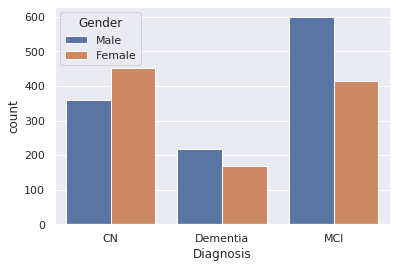

In [29]:
# Bar plot with counts
g = sns.countplot(data=data,
                  x='DX',
                  hue='PTGENDER')

# Rename x-Axis
g.set(xlabel='Diagnosis');

# Rename legend title
g.legend(title='Gender')

We see that we don't have to build a subset for every category like in *matplotlib*, we can simply split the data by passing a conditioning variable to the argument *hue*.

Another example is the visualization of joint distribution with the marginal distributions of two variables like the last example in the *matplotlib* section.

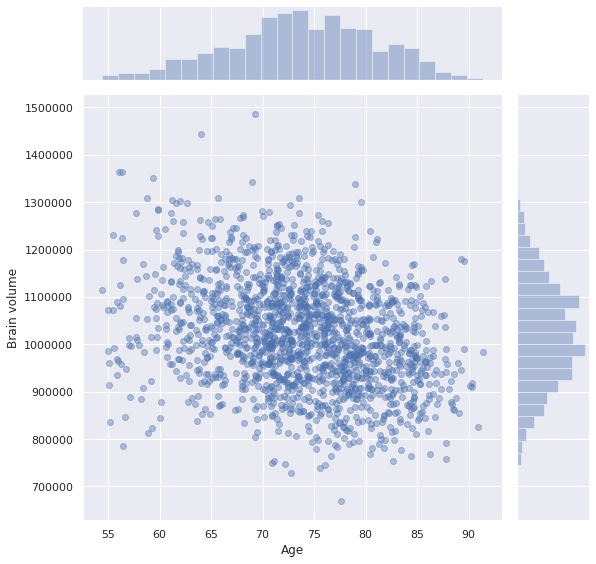

In [31]:
# Joint distribution and respective marginal distributions of age and brain volume
g = sns.jointplot(data=data, 
                   x='AGE',
                   y='WholeBrain',
                   kind='scatter', # kind=['scatter','hex','kde']
                   alpha=0.4,
                   height=8); # figsize not possible

# Rename axis labels
g.set_axis_labels('Age', 'Brain volume');

### Plot functions

A small list of *Seaborn* functions:

- **Boxplot:** sns.boxplot(x)
- **Violin Plot:** sns.violinplot(x)
- **Bar Plot:** sns.barplot(x,y)
- **Line Plot:** sns.lineplot(x,y)
- **Scatter Plot:** sns.scatterplot(x,y)
- **Faceted Scatter Plot:** sns.relplot(x,y)
- **Scatter Plot with regression line:** sns.lmplot(x,y)
- **KDE Plot:** sns.kde(x,y)

Visualizations with multiple plots

- **Scatter Plot with histograms:** sns.jointplot(x,y)
- **Scatter Plot Matrix:** sns.pairplot(df[['x','y',...]])
- ...

Optimized function for plotting categorical data:
- **Plotting categorical data:** sns.catplot(x,y,kind) *(kind=['swarm', 'violin', 'boxplot'])*

Check out the tutorial or the gallery for more examples.

https://seaborn.pydata.org/tutorial.html

https://seaborn.pydata.org/examples/index.html

### Exercise

Now, it's again time to practice. Please answer the following questions with a suitable representation.

1) **Plot again the joint distribution of age and brain volume by diagnosis.**

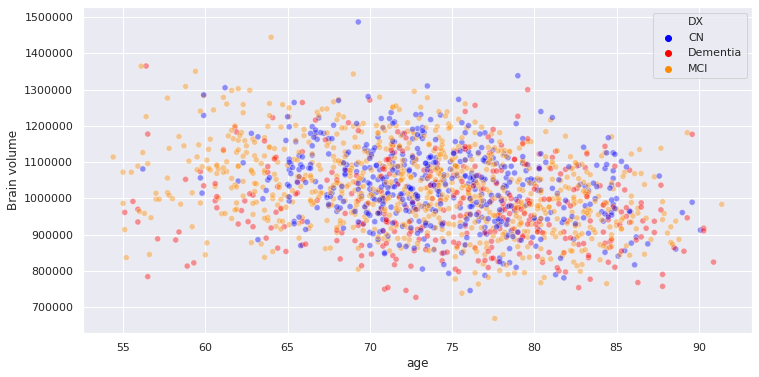

In [32]:
# Specify colors analogous to ex.3
colors=('blue', 'red', 'darkorange')

# Scatter
plt.figure(figsize=(12,6))
g=sns.scatterplot(data=data, 
                  x='AGE', 
                  y='WholeBrain', 
                  hue='DX', 
                  palette=colors, 
                  alpha= 0.4)

g.set(xlabel='age', ylabel='Brain volume');
#g.ylabel('brain volume');

2) **Plot a Scatter Plot Matrix for the variables 'ADAS11', 'ADAS13' and 'ADASQ4' by diagnoses.**

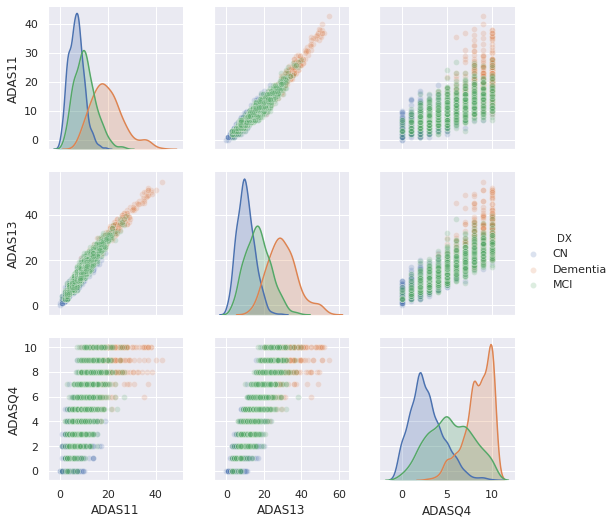

In [34]:
g = sns.pairplot(data[['ADAS11', 'ADAS13', 'ADASQ4', 'DX']].dropna(), 
                 hue='DX', 
                 plot_kws={'alpha':0.2})